In [2]:
import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import pearsonr, spearmanr
import datetime
from nltk.stem import WordNetLemmatizer
import nltk

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score



In [4]:
# Load tweet data from CSV
tweets_df = pd.read_excel('salah_compiled_tweets.xlsx')

countries = ['Nigeria']
tweets_df = tweets_df[tweets_df['author/location'].str.contains('|'.join(countries), case=False, na=False)]

print(tweets_df)

# Convert the date column to datetime format
tweets_df['date'] = pd.to_datetime(tweets_df['createdAt'])


# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Rejoin tokens into a single string
    return ' '.join(tokens)


tweets_df['processed_text'] = tweets_df['text'].apply(preprocess_text)


                 author/id author/userName               author/location  \
1751    942857000000000000        W_Kenayi                Abuja, Nigeria   
4289             379935880   Joshuaawenode                Warri, Nigeria   
5477              65907213       TimiFrost  Nigeria || Asgard || Wakanda   
5479              65907213       TimiFrost  Nigeria || Asgard || Wakanda   
5481              65907213       TimiFrost  Nigeria || Asgard || Wakanda   
...                    ...             ...                           ...   
20320  1063140000000000000      cayodeyjoe                 Ogun, Nigeria   
20326  1079400000000000000    mukhtaary281                Lagos, Nigeria   
20341  1063140000000000000      cayodeyjoe                 Ogun, Nigeria   
20359   868754000000000000      mr_asiwaju                Lagos, Nigeria   
20362  1079400000000000000    mukhtaary281                Lagos, Nigeria   

                            createdAt  likeCount  retweetCount  \
1751   Sun Jan 02 16:

[nltk_data] Downloading package punkt to C:\Users\Olayinka
[nltk_data]     Akerekan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Olayinka
[nltk_data]     Akerekan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Olayinka
[nltk_data]     Akerekan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Function to calculate sentiment score
def get_sentiment_score(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
tweets_df['sentiment_score'] = tweets_df['processed_text'].apply(get_sentiment_score)

tweets_df

author/id author/userName               author/location  \
1751    942857000000000000        W_Kenayi                Abuja, Nigeria   
4289             379935880   Joshuaawenode                Warri, Nigeria   
5477              65907213       TimiFrost  Nigeria || Asgard || Wakanda   
5479              65907213       TimiFrost  Nigeria || Asgard || Wakanda   
5481              65907213       TimiFrost  Nigeria || Asgard || Wakanda   
...                    ...             ...                           ...   
20320  1063140000000000000      cayodeyjoe                 Ogun, Nigeria   
20326  1079400000000000000    mukhtaary281                Lagos, Nigeria   
20341  1063140000000000000      cayodeyjoe                 Ogun, Nigeria   
20359   868754000000000000      mr_asiwaju                Lagos, Nigeria   
20362  1079400000000000000    mukhtaary281                Lagos, Nigeria   

                            createdAt  likeCount  retweetCount  \
1751   Sun Jan 02 16:37:32 +0000 2022          0             0   
4289   Sun Oct 03 19:47:46 +0000 2021          0             0   
5477   Tue Dec 28 21:56:36 +0000 2021          0             0   
5479   Tue Dec 28 20:17:28 +0000 2021          1             0   
5481   Tue Dec 28 21:56:36 +0000 2021          0             0   
...                               ...        ...           ...   
20320  Sat Sep 25 18:06:17 +0000 2021          1             0   
20326  Sat Sep 25 15:00:15 +0000 2021          1             0   
20341  Sat Sep 25 18:06:17 +0000 2021          1             0   
20359  Sat Sep 25 16:14:48 +0000 2021          0             0   
20362  Sat Sep 25 15:00:15 +0000 2021          1             0   

                                                    text  \
1751   Liverpool pressure is crazyy?? you won’t even ...   
4289                      Special goal from Salah ??????   
5477   The delight at Leicester winning is more than ...   
5479   Salah missed twice ??. Leicester have just got...   
5481   The delight at Leicester winning is more than ...   
...                                                  ...   
20320                Salah is fond of losing one on one.   
20326        Salah and TAA yet to play against brentford   
20341                Salah is fond of losing one on one.   
20359                     Not bad but Na Salah I want ??   
20362        Salah and TAA yet to play against brentford   

                           date  \
1751  2022-01-02 16:37:32+00:00   
4289  2021-10-03 19:47:46+00:00   
5477  2021-12-28 21:56:36+00:00   
5479  2021-12-28 20:17:28+00:00   
5481  2021-12-28 21:56:36+00:00   
...                         ...   
20320 2021-09-25 18:06:17+00:00   
20326 2021-09-25 15:00:15+00:00   
20341 2021-09-25 18:06:17+00:00   
20359 2021-09-25 16:14:48+00:00   
20362 2021-09-25 15:00:15+00:00   

                                          processed_text  sentiment_score  
1751   liverpool pressure crazyy wont even realise ma...         0.000000  
4289                                  special goal salah         0.357143  
5477   delight leicester winning pain salah blanking ...         0.222222  
5479               salah missed twice leicester got jail        -0.100000  
5481   delight leicester winning pain salah blanking ...         0.222222  
...                                                  ...              ...  
20320                          salah fond losing one one         0.000000  
20326                       salah taa yet play brentford         0.000000  
20341                          salah fond losing one one         0.000000  
20359                                  bad na salah want        -0.700000  
20362                       salah taa yet play brentford         0.000000  

[1482 rows x 10 columns]

In [6]:
import pandas as pd

# Load FPL performance data
fpl_data = pd.read_excel('FPL_logs_salah.xlsx')

# Convert 'Date' column to datetime and localize to UTC
fpl_data['Date'] = pd.to_datetime(fpl_data['Date']).dt.tz_localize('UTC')

# Extract only the date part (ignore time) for 'Date'
fpl_data['Date'] = fpl_data['Date'].dt.date

# Load tweets_df (ensure it has been loaded correctly)
# Example: tweets_df = pd.read_csv('tweets_data.csv')  # Adjust file type as needed

# Convert 'date' column in tweets_df to datetime
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce')  # Convert to datetime, with error handling

# Extract only the date part (ignore time) for 'date'
tweets_df['date'] = tweets_df['date'].dt.date

# Merge FPL data with sentiment data on the date
data = pd.merge(tweets_df, fpl_data, left_on='date', right_on='Date')

# Aggregate sentiment scores by match date
aggregated_sentiment = data.groupby('date')['sentiment_score'].mean().reset_index()

# Merge aggregated sentiment scores with FPL data on date
final_data = pd.merge(fpl_data, aggregated_sentiment, left_on='Date', right_on='date')


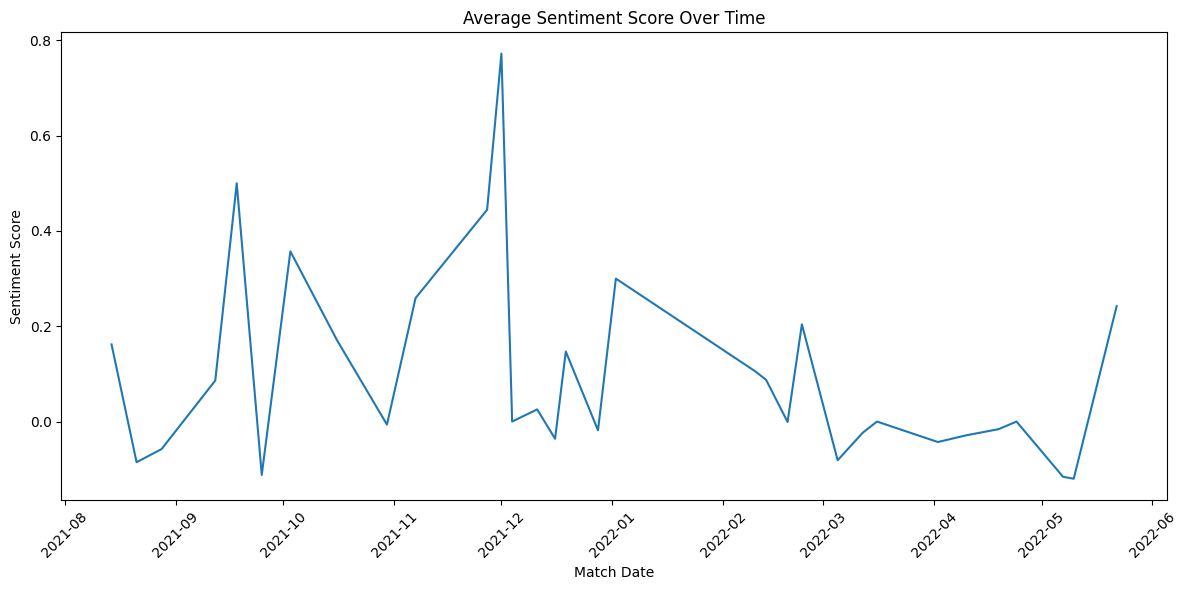

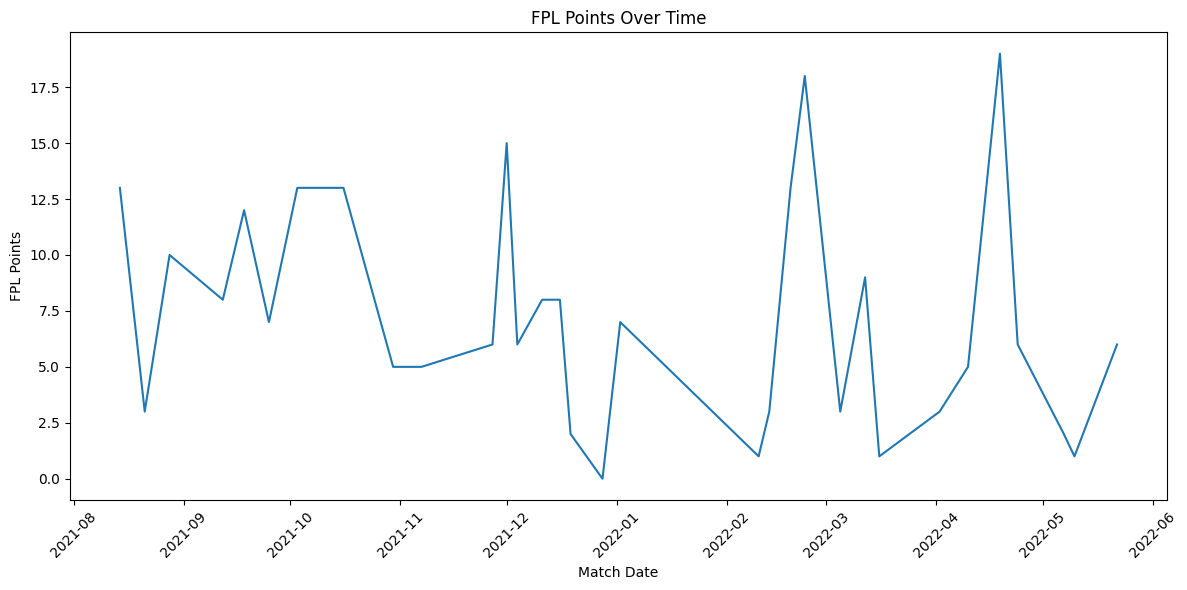

In [7]:
# Plot sentiment scores over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_data, x='date', y='sentiment_score')
plt.title('Average Sentiment Score Over Time')
plt.xlabel('Match Date')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot FPL points over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=final_data, x='date', y='FPL_points')
plt.title('FPL Points Over Time')
plt.xlabel('Match Date')
plt.ylabel('FPL Points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Interactive time series plot using Plotly
fig = px.line(final_data, x='date', y='sentiment_score', title='Sentiment Score Over Time')
fig.show()


In [8]:
# Check for missing values

# Option 1: Drop rows with NaN values
tweets_df = tweets_df.dropna(subset=['processed_text'])

# Option 2: Fill NaN values with an empty string
tweets_df['processed_text'] = tweets_df['processed_text'].fillna('')
print(tweets_df['processed_text'].isna().sum())

0


In [16]:
tweets_df = pd.DataFrame(data)

# Handle NaN values in 'processed_text'
tweets_df['processed_text'] = tweets_df['processed_text'].fillna('')

## Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(min_df=1, max_df=0.8)
X = vectorizer.fit_transform(tweets_df['processed_text'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Check and remove zero variance features
tfidf_df = tfidf_df.loc[:, tfidf_df.var() > 0]

# Concatenate with original data
tweets_df = pd.concat([tweets_df, tfidf_df], axis=1)

print(tweets_df)

               author/id  author/userName author/location  \
0     942857000000000000         W_Kenayi  Abuja, Nigeria   
1    1062050000000000000  abubakar_naibee   Kano, Nigeria   
2              365029203       lagzyswagz   Abuja,nigeria   
3             3084562116        RojaMiles        Nigeria    
4             3084562116        RojaMiles        Nigeria    
..                   ...              ...             ...   
918            195465932       royaldexta  Lagos, Nigeria   
919           2294417483         JaYfLiss  Lagos, Nigeria   
920           3145695136   Thereal_Nsikak  Lagos, Nigeria   
921           2294417483         JaYfLiss  Lagos, Nigeria   
922           2294417483         JaYfLiss  Lagos, Nigeria   

                          createdAt  likeCount  retweetCount  \
0    Sun Jan 02 16:37:32 +0000 2022          0             0   
1    Sun Jan 02 16:56:58 +0000 2022          3             0   
2    Sun Jan 02 09:14:10 +0000 2022          1             0   
3    Sun Ja

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the text data
X = vectorizer.fit_transform(tweets_df['processed_text'])

# Example: Convert continuous sentiment scores into categorical labels
tweets_df['sentiment_label'] = pd.cut(tweets_df['sentiment_score'], bins=[-float('inf'), -0.5, 0.5, float('inf')], labels=['Negative', 'Neutral', 'Positive'])
y = tweets_df['sentiment_label']


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostClassifier": GradientBoostingClassifier()
}

# Initialize and train the model
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(classification_report(y_test, y_pred))

    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

# Predict and evaluate the model



              precision    recall  f1-score   support

    Negative       1.00      0.40      0.57        10
     Neutral       0.96      1.00      0.98       259
    Positive       1.00      0.25      0.40         8

    accuracy                           0.96       277
   macro avg       0.99      0.55      0.65       277
weighted avg       0.96      0.96      0.95       277

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
              precision    recall  f1-score   support

    Negative       0.80      0.40      0.53        10
     Neutral       0.97      0.99      0.98       259
    Positive       0.83      0.62      0.71         8

    accuracy                           0.96       277
   macro avg       0.87      0.67      0.74       277
weighted avg       0.96      0.96      0.96       277

Classifiers:  KNeighborsClassifier Has a training score of 97.0 % accuracy score
              precision    recall  f1-score   support

    Negative       1.00

In [18]:

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the text data
X = vectorizer.fit_transform(tweets_df['processed_text'])

# Convert continuous sentiment scores into categorical labels
tweets_df['sentiment_label'] = pd.cut(tweets_df['sentiment_score'], bins=[-float('inf'), -0.5, 0.5, float('inf')], labels=['Negative', 'Neutral', 'Positive'])
y = tweets_df['sentiment_label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}

# Initialize a dictionary to store results
results = {
    "Classifier": [],
    "Accuracy": [],
    "Precision (Macro)": [],
    "Recall (Macro)": [],
    "F1 Score (Macro)": []
}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    # Train the model
    classifier.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
    # Get metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    
    # Store results
    results["Classifier"].append(name)
    results["Accuracy"].append(round(accuracy, 2))
    results["Precision (Macro)"].append(round(precision, 2))
    results["Recall (Macro)"].append(round(recall, 2))
    results["F1 Score (Macro)"].append(round(f1_score, 2))

    # Print classifier-specific training score
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f"{name} has a training score of {round(training_score.mean() * 100, 2)}% accuracy score")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Print results DataFrame
results_df


Logistic Regression has a training score of 94.43% accuracy score
K-Nearest Neighbors has a training score of 96.75% accuracy score
Support Vector Classifier has a training score of 98.15% accuracy score
Decision Tree Classifier has a training score of 98.45% accuracy score
Random Forest Classifier has a training score of 98.92% accuracy score
Gradient Boosting Classifier has a training score of 98.45% accuracy score


Classifier  Accuracy  Precision (Macro)  Recall (Macro)  \
0           Logistic Regression      0.96               0.99            0.55   
1           K-Nearest Neighbors      0.96               0.87            0.67   
2     Support Vector Classifier      0.96               0.99            0.58   
3      Decision Tree Classifier      0.97               0.91            0.76   
4      Random Forest Classifier      0.98               0.99            0.76   
5  Gradient Boosting Classifier      0.99               1.00            0.88   

   F1 Score (Macro)  
0              0.65  
1              0.74  
2              0.68  
3              0.81  
4              0.83  
5              0.93

In [19]:
# Pearson Correlation
pearson_corr, _ = pearsonr(final_data['sentiment_score'], final_data['FPL_points'])
print(f'Pearson Correlation: {pearson_corr}')

# Spearman Rank Correlation
spearman_corr, _ = spearmanr(final_data['sentiment_score'], final_data['FPL_points'])
print(f'Spearman Rank Correlation: {spearman_corr}')


Pearson Correlation: 0.4187290260651678
Spearman Rank Correlation: 0.39193932820411115


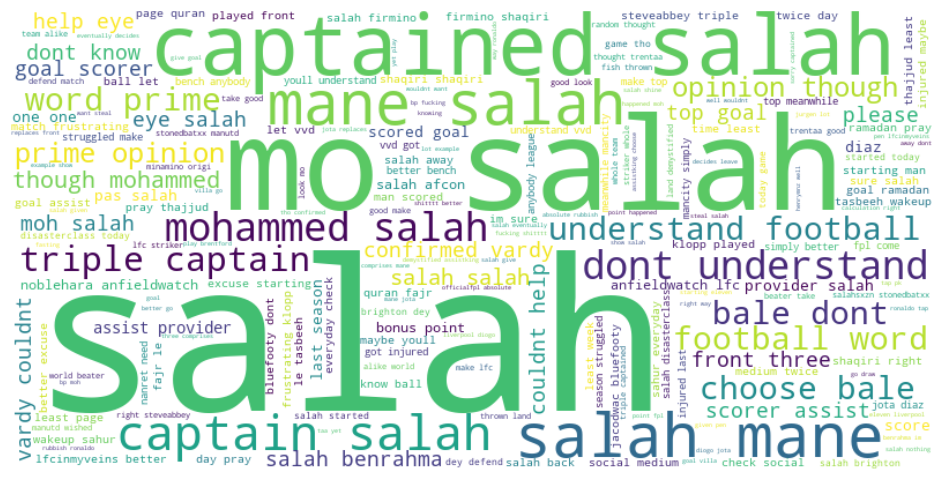

In [20]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ensure the 'processed_text' column contains the text data
# Combine all text entries into a single string
text = ' '.join(tweets_df['processed_text'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.show()


In [ ]:
# Save processed and aggregated data
final_data.to_csv('final_data.csv', index=False)
